In [12]:
import numpy as np
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [82]:
r9_neg = pysam.AlignmentFile("/scratch/gabai/methyl_mod/modifications/mod_mappings_neg.sorted.bam", "rb")
r9_pos = pysam.AlignmentFile("/scratch/gabai/methyl_mod/modifications/mod_mappings_pos.sorted.bam", "rb")

In [83]:
r9_neg_scores = []
for line in r9_neg:
    readID = line.query_name
    sequence = line.query_sequence
    flag = line.flag
    chrom = line.reference_name
    chroms.append(chrom)
    start = line.reference_start
    end = line.reference_end
    tags = line.tags
    for tag in tags:
        if tag[0] == 'Ml':
            scores = list(np.round(np.divide(tag[1],256, dtype = float), 2))
    score_max = np.mean(scores)
    r9_neg_scores.append(score_max)

In [84]:
r9_pos_scores = []
for line in r9_pos:
    readID = line.query_name
    sequence = line.query_sequence
    flag = line.flag
    chrom = line.reference_name
    start = line.reference_start
    end = line.reference_end
    tags = line.tags
    for tag in tags:
        if tag[0] == 'Ml':
            scores = list(np.round(np.divide(tag[1],256, dtype = float), 2))
    score_max = np.mean(scores)
    r9_pos_scores.append(score_max)

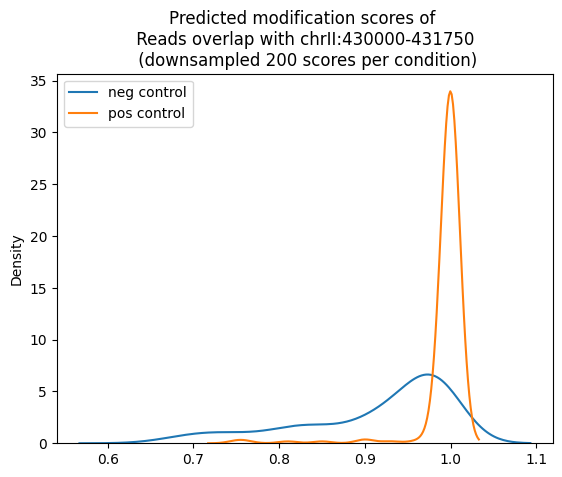

In [76]:
# pos_data = random.choices(r9_pos_scores, k= 200)
# neg_data = random.choices(r9_neg_scores, k= 200)
# sns.kdeplot(neg_data, label= "neg control")
# sns.kdeplot(pos_data, label= "pos control")
# plt.legend()
# plt.title("Predicted modification scores of \n Reads overlap with chrII:430000-431750 \n (downsampled 200 scores per condition)")
# plt.savefig("/scratch/gabai/methyl_mod/modifications/pho5_density_plot.pdf")
# plt.show()

In [81]:
print(len(r9_neg_scores), len(r9_pos_scores))

0 0


In [79]:
pos_data_all = random.choices(r9_pos_scores, k= 5000)
neg_data_all = random.choices(r9_neg_scores, k= 5000)
sns.kdeplot(neg_data_all, label= "neg control")
sns.kdeplot(pos_data_all, label= "pos control")
plt.legend()
plt.title("Predicted modification scores of \n Reads (downsampled 5000 scores per condition)")
plt.savefig("/scratch/gabai/methyl_mod/modifications/all_reads_density_plot_mean.pdf")
plt.show()

IndexError: list index out of range